In [1]:
from artifacts_ipv6_sra_scanning.config import *
import pickle
import os
import ipaddress
import glob
from tqdm.auto import tqdm
import country_converter as coco
from parallel_pandas import ParallelPandas
ParallelPandas.initialize(n_cpu=24, split_factor=1, disable_pr_bar=False)

2025-10-09 13:13:29.048 | INFO     | artifacts_ipv6_sra_scanning.config:<module>:22 - PROJ_ROOT path is: /home/service/artifacts-ipv6-sra-scanning


In [2]:
files = glob.glob(f'{INTERIM_DATA_DIR}/*.csv')
#files = glob.glob(f'{INTERIM_DATA_DIR}/*.csv')[:-1]

In [3]:
files

['/home/service/artifacts-ipv6-sra-scanning/data/interim/router-ips.csv',
 '/home/service/artifacts-ipv6-sra-scanning/data/interim/hitlist-ips.csv',
 '/home/service/artifacts-ipv6-sra-scanning/data/interim/itdk-ips.csv',
 '/home/service/artifacts-ipv6-sra-scanning/data/interim/ripe-ips.csv',
 '/home/service/artifacts-ipv6-sra-scanning/data/interim/ixp-ips.csv']

In [7]:
info_columns = ['Geo','AS-Number','BGP-Prefix','Org']

In [5]:
dfs = [pl.scan_csv(file) for file in tqdm(files)]

  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
def concat_frames(dfs, labels, column,columns):
    if len(dfs) != len(labels):
        raise ValueError("The number of DataFrames must match the number of labels.")

    enriched_dfs = [
        df.select(columns).unique().with_columns(pl.lit(label).alias(column))
        for df, label in tqdm(zip(dfs, labels))
    ]

    return pl.concat(enriched_dfs, how="vertical")

In [3]:
labels=['SRA','TUM Hitlist','CAIDA ITDK','RIPE Atlas','IXP Flows']
#labels=['SRA','Hitlist','ITDK','RIPE-Atlas']

In [4]:
column = 'AS-Number'
label='ASN'

In [9]:
tmp = concat_frames(dfs,labels,'source',column).collect().to_pandas()

0it [00:00, ?it/s]

In [5]:
tmp = pl.DataFrame()

In [6]:
#vh.plot_upsetplot(tmp,column,'source',labels,f'upsetplot_sra_all_cut_{column}',
#                   label,title = '',bbox=(0.9,1),pickle_file=f'{INTERIM_DATA_DIR}/upsetplot_sra_all_cut_{column}.pkl',minsubsetsize='0%', colors=["#375E97", "#FB6542", "#c1195c", "#37975e",'#cc9900','#9900ff'],
#                fontsize=10,ncols=2)

  0%|          | 0/10 [00:00<?, ?it/s]

/home/service/artifacts-ipv6-sra-scanning/reports/figures/upsetplot_sra_all_cut_AS-Number.png


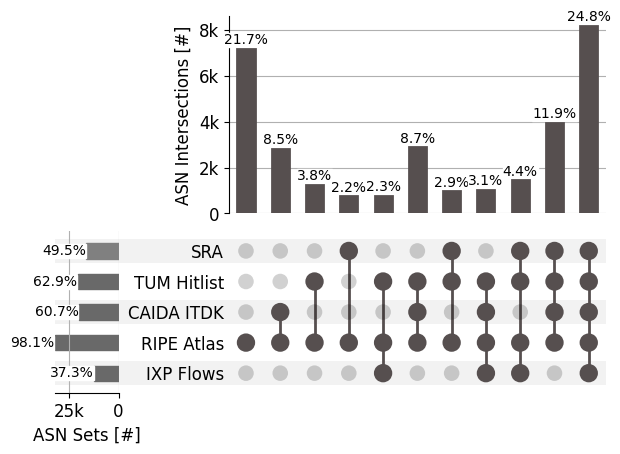

In [7]:
vh.plot_upsetplot(tmp,column,'source',labels,f'upsetplot_sra_all_cut_{column}',
                   label,title = '',bbox=(0.9,1),pickle_file=f'{INTERIM_DATA_DIR}/upsetplot_sra_all_cut_{column}.pkl',minsubsetsize='2.0%', colors=["#564F4F"]*6,
                fontsize=10,ncols=2,legend=False)

  0%|          | 0/10 [00:00<?, ?it/s]

/home/service/artifacts-ipv6-sra-scanning/reports/figures/upsetplot_sra_all_full_AS-Number.png


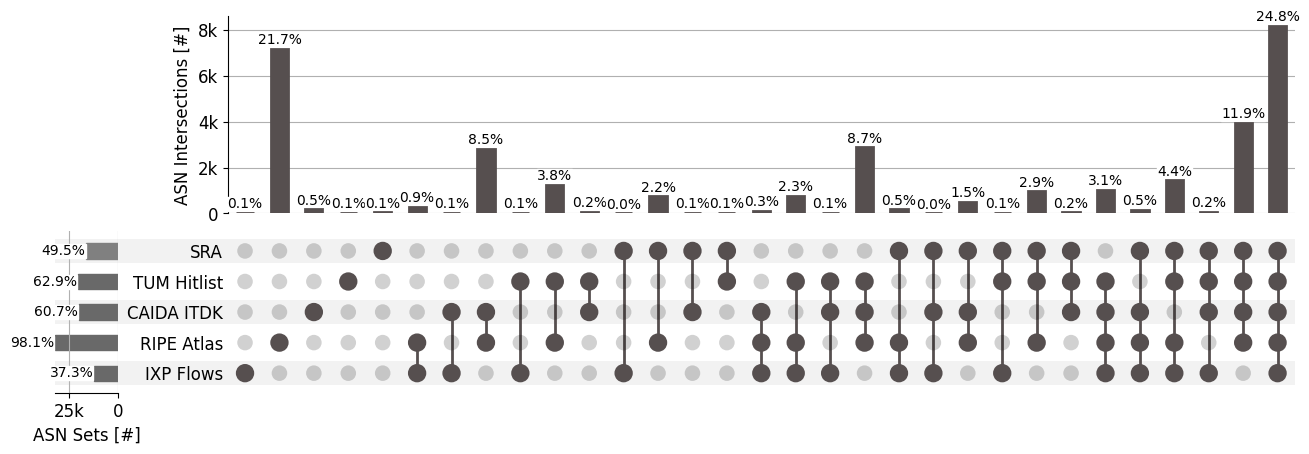

In [11]:
vh.plot_upsetplot(tmp,column,'source',labels,f'upsetplot_sra_all_full_{column}',
                   label,title = '',bbox=(0.9,1),pickle_file=f'{INTERIM_DATA_DIR}/upsetplot_sra_all_full_{column}.pkl',minsubsetsize='0%', colors=["#564F4F"]*6,
                fontsize=10,ncols=2,legend=False)